# Python charting libraries

_This workbook details example of interfacing PyKX with Python charting libraries._

PyKX supports rich datatype mapping meaning you can convert data from PyKX objects to:
- Python objects using `.py()`
- NumPy objects using `.np()`
- Pandas objects using `.pd()`
- PyArrow objects using `.pa()`

The full breakdown of how these map is documented [here.](https://code.kx.com/pykx/api/pykx-q-data/type_conversions.html)

The resulting objects behave as expected with all Python libraries.

For efficiency and exactness the examples below aim to use PyKX objects directly, minimising conversions when possible.

In [ ]:
import os
os.environ['PYKX_IGNORE_QHOME'] = '1' # Ignore symlinking PyKX q libraries to QHOME
os.environ['PYKX_Q_LOADED_MARKER'] = '' # Only used here for running Notebook under mkdocs-jupyter during document generation.

In [1]:
import pykx as kx
tab = kx.Table(data={
    'sym':kx.random.random(1000, ['a', 'b', 'c']), 
    'price':kx.random.random(1000, 1.0), 
    'size':kx.random.random(1000, 10),
    'quantity':kx.random.random(1000,100),
    'in_stock':kx.random.random(1000, [True, False])})
tab.head()

,sym,price,size,quantity,in_stock
,,,,,
0,a,0.9094126,4,5,1b
1,a,0.2988477,5,18,1b
2,c,0.454063,8,11,0b
3,b,0.156942,1,36,1b
4,c,0.04699265,4,43,1b


## Matplotlib

Let's generate a scatter plot using the `price` and `size` columns of our table. 

Use the `scatter(tab['price'], tab['quantity'])` notation to access PyKX objects directly. 

The `x=` and `y=` syntax requires conversion to a dataframe using `.pd()` .i.e `scatter(tab.pd(), x='price' ,y='quantity')` 

`scatter` uses a series of 1D arrays and one of the only charts where you don't need to start by converting the column values in NumPy objects using `.np()`.

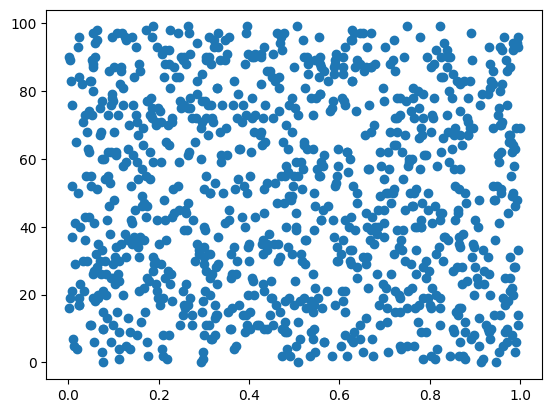

In [10]:
import matplotlib.pyplot as plt

plt.scatter(tab['price'], tab['quantity'])
plt.show()

To make the column values compatible with most [Matplotlib charts](https://matplotlib.org/), first convert them to NumPy objects using the `.np()` function.

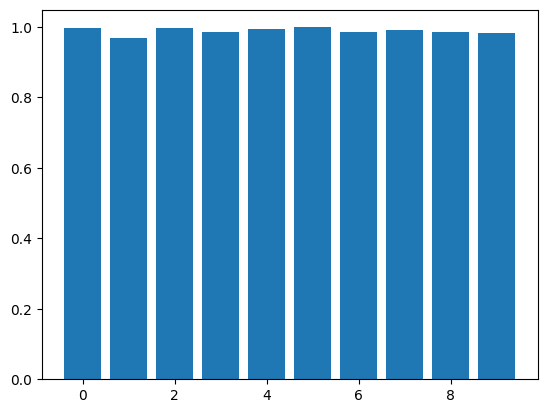

In [ ]:
plt.bar(tab['size'].np(), tab['price'].np())
plt.show()

## Plotly

[Plotly](https://plotly.com/python/) allows you to pass `vector` objects as the `color` argument. Set this parameter using the `sym` column to obtain the scatter chart below.


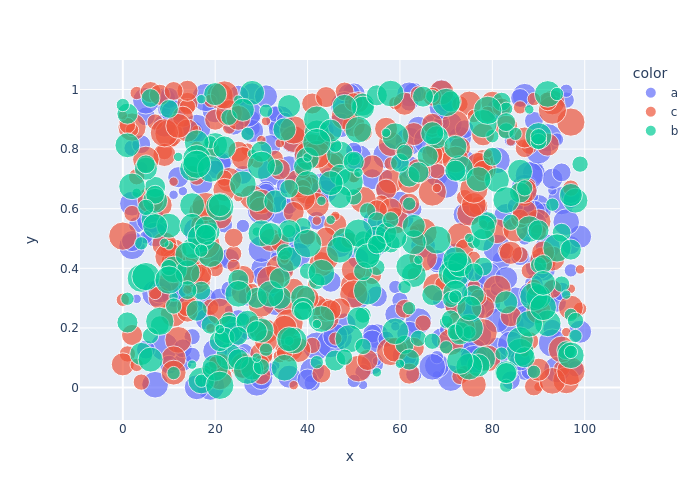

In [8]:
import plotly.express as px

fig = px.scatter(
    x=tab['quantity'],
    y=tab['price'],
    size=tab['size'],
    color=tab['sym'])
fig.show(renderer="png")

Unlike with Pandas, a PyKX table cannot be passed as the first argument with the following data being passed as column names. Each axis must be explicitly set. 

To use this feature, first convert to Pandas using the `.pd()` function.

To create a density heatmap using Plotly, convert the table to a Pandas Dataframe. The axes are simply assigned the column names as strings.

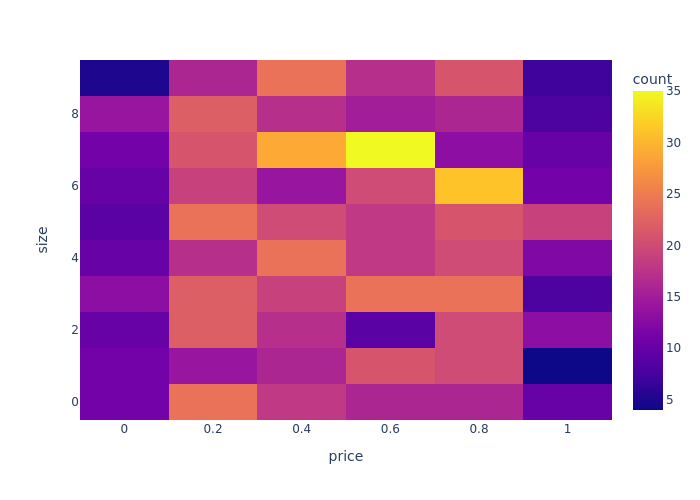

In [5]:
fig = px.density_heatmap(
    tab.pd(),
    x='price', 
    y='size')
fig.show(renderer="png")

## Seaborn

[Seaborn](https://seaborn.pydata.org/) allows you to set `data` as a PyKX table name without conversions and then call the `x` and `y` parameters using only the column names of that table.

The bar chart below demonstrates this by setting the data as the table object and using the column names for all parameters, without any conversions.

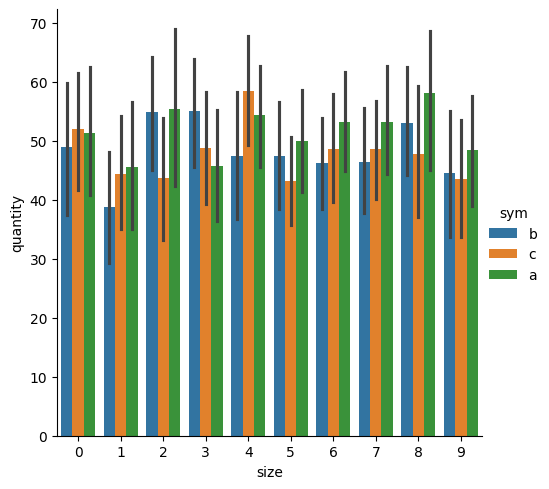

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(
    kind='bar',
    data=tab,
    x='size',
    y='quantity',
    hue='sym'
)
plt.show()

Seaborn supports joining plots together, allowing you access to another layer of visualisation.

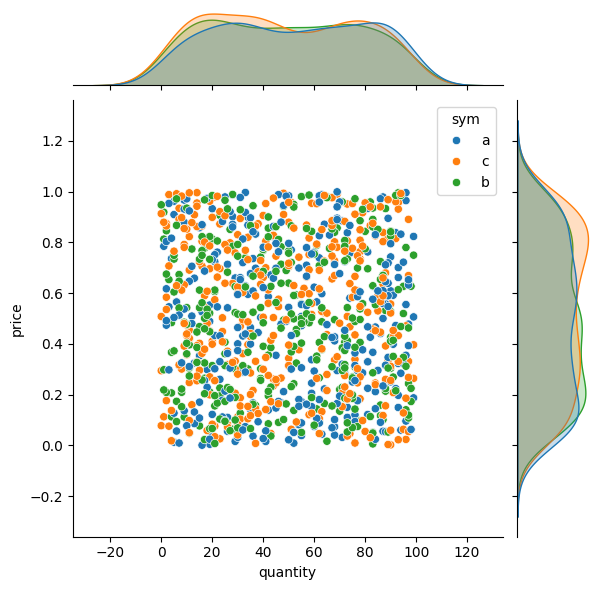

In [7]:
sns.jointplot(data=tab, x="quantity", y="price", hue="sym")
plt.show()